# Step 1: Preprocessing 

In [311]:
#Import Libraries and Dependencies 
import pandas as pd
import datetime
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler 

In [312]:
# Import CSV and Convert to DataFrame 
df1 = pd.read_csv(Path('/Users/kristenmaskery/Desktop/CrimeStoppers/Resources/crime_rate.csv'))
df1=pd.DataFrame(df1)
df1.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Lat,Long,ObjectId
0,-8.840549e+06,5.431712e+06,201,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,1
1,-8.840549e+06,5.431712e+06,202,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,2
2,-8.840549e+06,5.431712e+06,203,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,3
3,-8.840549e+06,5.431712e+06,204,GO-20141301077,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Other,1420,100,Assault With Weapon,...,7.0,Tuesday,22,Assault,D32,36,Newtonbrook West (36),43.781639,-79.416,4
4,-8.839881e+06,5.413806e+06,205,GO-20141300854,2014/01/07 05:00:00+00,2014/01/07 05:00:00+00,Commercial,2120,200,B&E,...,7.0,Tuesday,21,Break and Enter,D14,79,University (79),43.665390,-79.410,5


In [313]:
#Drop Reported_date,Ucr_Code,Ucr_ext, Premise_type 
df1.drop('X', axis=1, inplace=True)
df1.drop('Y', axis=1, inplace=True)
df1.drop('reporteddate', axis=1, inplace=True)
df1.drop('premisetype', axis=1, inplace=True)
df1.drop('ucr_code', axis=1, inplace=True)
df1.drop('ucr_ext', axis=1, inplace=True)
df1.drop('Index_', axis=1, inplace=True)
df1.drop('event_unique_id', axis=1, inplace=True)
df1.drop('occurrencedayofyear', axis=1, inplace=True)
df1.drop('reportedmonth', axis=1, inplace=True)
df1.drop('reportedday', axis=1, inplace=True)
df1.drop('reporteddayofyear', axis=1, inplace=True)
df1.drop('reporteddayofweek', axis=1, inplace=True)
df1.drop('reportedhour', axis=1, inplace=True)
df1.drop('occurrenceyear', axis=1, inplace=True)
df1.drop('Division', axis=1, inplace=True)
df1.drop('Hood_ID', axis=1, inplace=True)
df1

,occurrencedate,offence,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long,ObjectId
0,2014/01/07 05:00:00+00,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,1
1,2014/01/07 05:00:00+00,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,2
2,2014/01/07 05:00:00+00,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,3
3,2014/01/07 05:00:00+00,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,4
4,2014/01/07 05:00:00+00,B&E,2014,January,7.0,Tuesday,21,Break and Enter,University (79),43.665390,-79.410,5
...,...,...,...,...,...,...,...,...,...,...,...,...
206430,2019/08/13 04:00:00+00,Theft Of Motor Vehicle,2019,August,13.0,Tuesday,17,Auto Theft,Humber Summit (21),43.750652,-79.549,206431
206431,2019/08/13 04:00:00+00,Theft Of Motor Vehicle,2019,August,13.0,Tuesday,14,Auto Theft,Rockcliffe-Smythe (111),43.683521,-79.481,206432
206432,2019/08/13 04:00:00+00,Theft Of Motor Vehicle,2019,August,13.0,Tuesday,13,Auto Theft,Humber Summit (21),43.758480,-79.571,206433
206433,2019/08/13 04:00:00+00,Theft Of Motor Vehicle,2019,August,13.0,Tuesday,11,Auto Theft,Rockcliffe-Smythe (111),43.675377,-79.506,206434


In [314]:
#Strip Date 
df1['occurrencedate'] = df1['occurrencedate'].map(lambda x: str(x)[:+10])
df1

,occurrencedate,offence,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,occurrencehour,MCI,Neighbourhood,Lat,Long,ObjectId
0,2014/01/07,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,1
1,2014/01/07,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,2
2,2014/01/07,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,3
3,2014/01/07,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,4
4,2014/01/07,B&E,2014,January,7.0,Tuesday,21,Break and Enter,University (79),43.665390,-79.410,5
...,...,...,...,...,...,...,...,...,...,...,...,...
206430,2019/08/13,Theft Of Motor Vehicle,2019,August,13.0,Tuesday,17,Auto Theft,Humber Summit (21),43.750652,-79.549,206431
206431,2019/08/13,Theft Of Motor Vehicle,2019,August,13.0,Tuesday,14,Auto Theft,Rockcliffe-Smythe (111),43.683521,-79.481,206432
206432,2019/08/13,Theft Of Motor Vehicle,2019,August,13.0,Tuesday,13,Auto Theft,Humber Summit (21),43.758480,-79.571,206433
206433,2019/08/13,Theft Of Motor Vehicle,2019,August,13.0,Tuesday,11,Auto Theft,Rockcliffe-Smythe (111),43.675377,-79.506,206434


In [315]:
#Rename Occurence Column to merge with df2
df1 = df1.rename({'occurrencedate': 'Date'}, axis=1)
df1 = df1.rename({'occurrencehour':'hour_num'}, axis=1)          
df1.head()

,Date,offence,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,MCI,Neighbourhood,Lat,Long,ObjectId
0,2014/01/07,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,1
1,2014/01/07,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,2
2,2014/01/07,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,3
3,2014/01/07,Assault With Weapon,2014,January,7.0,Tuesday,22,Assault,Newtonbrook West (36),43.781639,-79.416,4
4,2014/01/07,B&E,2014,January,7.0,Tuesday,21,Break and Enter,University (79),43.665390,-79.410,5


In [316]:
# convert the 'Date' column to datetime format
df1['Date'] = pd.to_datetime(df1['Date'], infer_datetime_format=True)
df1
#set start and end date for years we want to keep
start_date = '01-08-2014'
end_date = '11-14-2018'
#Add them to the df2
mask = (df1['Date'] > start_date) & (df1['Date'] <= end_date)
df1 = df1.loc[mask]
df1
#convert occurenceday column to integer
df1['occurrenceday'] = df1['occurrenceday'].astype(int)
df1

,Date,offence,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,MCI,Neighbourhood,Lat,Long,ObjectId
5,2014-01-09,B&E,2014,January,9,Thursday,11,Break and Enter,Islington-City Centre West (14),43.646061,-79.531,6
6,2014-01-16,Assault,2014,January,16,Thursday,0,Assault,Junction Area (90),43.663498,-79.462,7
7,2014-01-16,Assault,2014,January,16,Thursday,2,Assault,Bay Street Corridor (76),43.657040,-79.381,8
8,2014-01-16,B&E,2014,January,16,Thursday,17,Break and Enter,Scarborough Village (139),43.744343,-79.214,9
9,2014-01-16,Robbery - Business,2014,January,16,Thursday,19,Robbery,Humber Summit (21),43.748562,-79.559,10
...,...,...,...,...,...,...,...,...,...,...,...,...
205885,2018-11-14,Theft Of Motor Vehicle,2018,November,14,Wednesday,11,Auto Theft,Wychwood (94),43.682190,-79.419,205886
205886,2018-11-14,Theft Of Motor Vehicle,2018,November,14,Wednesday,22,Auto Theft,Yorkdale-Glen Park (31),43.717758,-79.468,205887
205887,2018-11-14,Theft Of Motor Vehicle,2018,November,14,Wednesday,19,Auto Theft,Clanton Park (33),43.735584,-79.443,205888
205888,2018-11-14,Theft Of Motor Vehicle,2018,November,14,Wednesday,20,Auto Theft,Woodbine Corridor (64),43.667030,-79.314,205889


In [317]:
#read in temperature data 
df2 = pd.read_csv(Path('/Users/kristenmaskery/Desktop/CrimeStoppers/Resources/Toronto_temp_clean.csv'))
df2=pd.DataFrame(df2)
df2

,Date_,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2018-01-31,"2,018",1,31,-7.0,1.0,Winter,No,Yes
1,2018-01-30,"2,018",1,30,-11.0,0.0,Winter,No,No
2,2018-01-29,"2,018",1,29,-4.0,5.0,Winter,No,Yes
3,2018-01-28,"2,018",1,28,1.0,0.0,Winter,No,No
4,2018-01-27,"2,018",1,27,5.0,2.0,Winter,Yes,No
...,...,...,...,...,...,...,...,...,...
2884,1941-12-01,1941,12,1,-1.5,41.1,Winter,Yes,Yes
2885,1940-12-01,1940,12,1,-3.6,82.6,Winter,Yes,Yes
2886,1939-12-01,1939,12,1,NaN,NaN,Winter,No,No
2887,1938-12-01,1938,12,1,-2.5,27.4,Winter,Yes,Yes


In [318]:
#Rename Date_ Column to merge with df1
df2 = df2.rename({'Date_': 'Date'}, axis=1)
df2.head()

,Date,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2018-01-31,"2,018",1,31,-7.0,1.0,Winter,No,Yes
1,2018-01-30,"2,018",1,30,-11.0,0.0,Winter,No,No
2,2018-01-29,"2,018",1,29,-4.0,5.0,Winter,No,Yes
3,2018-01-28,"2,018",1,28,1.0,0.0,Winter,No,No
4,2018-01-27,"2,018",1,27,5.0,2.0,Winter,Yes,No


In [319]:
#Convert Date column to date time 
df2['Date'] = pd.to_datetime(df2['Date']) 
df2.head()
#set start and end date for years we want to keep
start_date = '01-08-2014'
end_date = '01-01-2019'
#Add them to the df2
mask = (df2['Date'] > start_date) & (df2['Date'] <= end_date)
df2 = df2.loc[mask]
#Sort Values from 2014 to 2018
df2.sort_values(by=['Date'], inplace=True, ascending=True)
df2

,Date,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
146,2014-01-09,"2,014",1,9,-11.0,0.0,Winter,No,No
145,2014-01-10,"2,014",1,10,-3.0,3.0,Winter,Yes,Yes
144,2014-01-11,"2,014",1,11,4.0,8.0,Winter,Yes,No
143,2014-01-12,"2,014",1,12,1.0,0.0,Winter,No,No
142,2014-01-13,"2,014",1,13,4.0,1.0,Winter,Yes,No
...,...,...,...,...,...,...,...,...,...
2422,2018-11-10,"2,018",11,10,0.0,0.0,Fall,No,No
2421,2018-11-11,"2,018",11,11,1.0,0.0,Fall,No,No
2420,2018-11-12,"2,018",11,12,4.0,1.0,Fall,Yes,No
2419,2018-11-13,"2,018",11,13,-1.0,1.0,Fall,Yes,No


In [320]:
df1.shape
#df2.shape

(162096, 12)

In [321]:
#Merge df1 & df2 on date column
merged_df = pd.merge(left=df1, right=df2, how='left', left_on='Date', right_on='Date')
merged_df

,Date,offence,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,MCI,Neighbourhood,Lat,Long,ObjectId,Year_,Month_,Day_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2014-01-09,B&E,2014,January,9,Thursday,11,Break and Enter,Islington-City Centre West (14),43.646061,-79.531,6,"2,014",1,9,-11.0,0.0,Winter,No,No
1,2014-01-16,Assault,2014,January,16,Thursday,0,Assault,Junction Area (90),43.663498,-79.462,7,"2,014",1,16,-3.0,2.0,Winter,No,Yes
2,2014-01-16,Assault,2014,January,16,Thursday,2,Assault,Bay Street Corridor (76),43.657040,-79.381,8,"2,014",1,16,-3.0,2.0,Winter,No,Yes
3,2014-01-16,B&E,2014,January,16,Thursday,17,Break and Enter,Scarborough Village (139),43.744343,-79.214,9,"2,014",1,16,-3.0,2.0,Winter,No,Yes
4,2014-01-16,Robbery - Business,2014,January,16,Thursday,19,Robbery,Humber Summit (21),43.748562,-79.559,10,"2,014",1,16,-3.0,2.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162091,2018-11-14,Theft Of Motor Vehicle,2018,November,14,Wednesday,11,Auto Theft,Wychwood (94),43.682190,-79.419,205886,"2,018",11,14,-2.0,0.0,Fall,No,No
162092,2018-11-14,Theft Of Motor Vehicle,2018,November,14,Wednesday,22,Auto Theft,Yorkdale-Glen Park (31),43.717758,-79.468,205887,"2,018",11,14,-2.0,0.0,Fall,No,No
162093,2018-11-14,Theft Of Motor Vehicle,2018,November,14,Wednesday,19,Auto Theft,Clanton Park (33),43.735584,-79.443,205888,"2,018",11,14,-2.0,0.0,Fall,No,No
162094,2018-11-14,Theft Of Motor Vehicle,2018,November,14,Wednesday,20,Auto Theft,Woodbine Corridor (64),43.667030,-79.314,205889,"2,018",11,14,-2.0,0.0,Fall,No,No


In [322]:
#Clean merged df 
merged_df.drop('ObjectId', axis=1, inplace=True)
merged_df.drop('offence', axis=1, inplace=True)
merged_df.drop('Year_', axis=1, inplace=True)
merged_df.drop('Day_', axis=1, inplace=True)
merged_df.drop('Neighbourhood', axis=1, inplace=True)
merged_df

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,MCI,Lat,Long,Month_,Mean_temp,Total_Precip,Season,Rain,Snow
0,2014-01-09,2014,January,9,Thursday,11,Break and Enter,43.646061,-79.531,1,-11.0,0.0,Winter,No,No
1,2014-01-16,2014,January,16,Thursday,0,Assault,43.663498,-79.462,1,-3.0,2.0,Winter,No,Yes
2,2014-01-16,2014,January,16,Thursday,2,Assault,43.657040,-79.381,1,-3.0,2.0,Winter,No,Yes
3,2014-01-16,2014,January,16,Thursday,17,Break and Enter,43.744343,-79.214,1,-3.0,2.0,Winter,No,Yes
4,2014-01-16,2014,January,16,Thursday,19,Robbery,43.748562,-79.559,1,-3.0,2.0,Winter,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162091,2018-11-14,2018,November,14,Wednesday,11,Auto Theft,43.682190,-79.419,11,-2.0,0.0,Fall,No,No
162092,2018-11-14,2018,November,14,Wednesday,22,Auto Theft,43.717758,-79.468,11,-2.0,0.0,Fall,No,No
162093,2018-11-14,2018,November,14,Wednesday,19,Auto Theft,43.735584,-79.443,11,-2.0,0.0,Fall,No,No
162094,2018-11-14,2018,November,14,Wednesday,20,Auto Theft,43.667030,-79.314,11,-2.0,0.0,Fall,No,No


In [323]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()

In [324]:
#Fit the Label Encoder 
label_encoder.fit(merged_df["Season"])

LabelEncoder()

In [325]:
# List the Encoded Classes
list(label_encoder.classes_)
# Encode the Seasons as an Integer
merged_df["Seasons"] = label_encoder.transform(merged_df["Season"])
merged_df.head()
#Seasons Dictionary
seasons_num = {
    "Fall": 1,
    "Spring": 2,
    "Summer": 3,
    "Winter": 4,
}
#Add Months Dictionary to DataFrame
merged_df["Seasons_Num"] = merged_df["Season"].apply(lambda x: seasons_num[x])
merged_df.head()

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,MCI,Lat,Long,Month_,Mean_temp,Total_Precip,Season,Rain,Snow,Seasons,Seasons_Num
0,2014-01-09,2014,January,9,Thursday,11,Break and Enter,43.646061,-79.531,1,-11.0,0.0,Winter,No,No,3,4
1,2014-01-16,2014,January,16,Thursday,0,Assault,43.663498,-79.462,1,-3.0,2.0,Winter,No,Yes,3,4
2,2014-01-16,2014,January,16,Thursday,2,Assault,43.657040,-79.381,1,-3.0,2.0,Winter,No,Yes,3,4
3,2014-01-16,2014,January,16,Thursday,17,Break and Enter,43.744343,-79.214,1,-3.0,2.0,Winter,No,Yes,3,4
4,2014-01-16,2014,January,16,Thursday,19,Robbery,43.748562,-79.559,1,-3.0,2.0,Winter,No,Yes,3,4


In [326]:
#Drop Seasons Column 
merged_df.drop(["Season", "Seasons"], axis=1, inplace=True)
merged_df.head()

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,MCI,Lat,Long,Month_,Mean_temp,Total_Precip,Rain,Snow,Seasons_Num
0,2014-01-09,2014,January,9,Thursday,11,Break and Enter,43.646061,-79.531,1,-11.0,0.0,No,No,4
1,2014-01-16,2014,January,16,Thursday,0,Assault,43.663498,-79.462,1,-3.0,2.0,No,Yes,4
2,2014-01-16,2014,January,16,Thursday,2,Assault,43.657040,-79.381,1,-3.0,2.0,No,Yes,4
3,2014-01-16,2014,January,16,Thursday,17,Break and Enter,43.744343,-79.214,1,-3.0,2.0,No,Yes,4
4,2014-01-16,2014,January,16,Thursday,19,Robbery,43.748562,-79.559,1,-3.0,2.0,No,Yes,4


In [327]:
#Create Second Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["MCI"])

LabelEncoder()

In [328]:
# List the Encoded Classes
list(label_encoder.classes_)
# Encode the MCI's as an Integer
merged_df["Offences_Type"] = label_encoder.transform(merged_df["MCI"])
merged_df.head()

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,MCI,Lat,Long,Month_,Mean_temp,Total_Precip,Rain,Snow,Seasons_Num,Offences_Type
0,2014-01-09,2014,January,9,Thursday,11,Break and Enter,43.646061,-79.531,1,-11.0,0.0,No,No,4,2
1,2014-01-16,2014,January,16,Thursday,0,Assault,43.663498,-79.462,1,-3.0,2.0,No,Yes,4,0
2,2014-01-16,2014,January,16,Thursday,2,Assault,43.657040,-79.381,1,-3.0,2.0,No,Yes,4,0
3,2014-01-16,2014,January,16,Thursday,17,Break and Enter,43.744343,-79.214,1,-3.0,2.0,No,Yes,4,2
4,2014-01-16,2014,January,16,Thursday,19,Robbery,43.748562,-79.559,1,-3.0,2.0,No,Yes,4,3


In [329]:
#MCI Dictionary
Offences_num = {
    "Assault": 1,
    "Auto Theft": 2,
    "Break and Enter": 3,
    "Robbery": 4,
    "Theft Over":5,
}
#Add MCI Dictionary to DataFrame
merged_df["Offences_type"] = merged_df["MCI"].apply(lambda x: Offences_num[x])
merged_df.head()
# Drop MCI & Offences_Type Columns 
merged_df.drop(["MCI", "Offences_Type"], axis=1, inplace=True)
merged_df.head()

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,Lat,Long,Month_,Mean_temp,Total_Precip,Rain,Snow,Seasons_Num,Offences_type
0,2014-01-09,2014,January,9,Thursday,11,43.646061,-79.531,1,-11.0,0.0,No,No,4,3
1,2014-01-16,2014,January,16,Thursday,0,43.663498,-79.462,1,-3.0,2.0,No,Yes,4,1
2,2014-01-16,2014,January,16,Thursday,2,43.657040,-79.381,1,-3.0,2.0,No,Yes,4,1
3,2014-01-16,2014,January,16,Thursday,17,43.744343,-79.214,1,-3.0,2.0,No,Yes,4,3
4,2014-01-16,2014,January,16,Thursday,19,43.748562,-79.559,1,-3.0,2.0,No,Yes,4,4


In [330]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["occurrencedayofweek"])
# List the Encoded Classes
list(label_encoder.classes_)
# Encode the weekday as an Integer
merged_df["Day_Of_Week"] = label_encoder.transform(merged_df["occurrencedayofweek"])
merged_df.head()

,Date,reportedyear,occurrencemonth,occurrenceday,occurrencedayofweek,hour_num,Lat,Long,Month_,Mean_temp,Total_Precip,Rain,Snow,Seasons_Num,Offences_type,Day_Of_Week
0,2014-01-09,2014,January,9,Thursday,11,43.646061,-79.531,1,-11.0,0.0,No,No,4,3,4
1,2014-01-16,2014,January,16,Thursday,0,43.663498,-79.462,1,-3.0,2.0,No,Yes,4,1,4
2,2014-01-16,2014,January,16,Thursday,2,43.657040,-79.381,1,-3.0,2.0,No,Yes,4,1,4
3,2014-01-16,2014,January,16,Thursday,17,43.744343,-79.214,1,-3.0,2.0,No,Yes,4,3,4
4,2014-01-16,2014,January,16,Thursday,19,43.748562,-79.559,1,-3.0,2.0,No,Yes,4,4,4


In [331]:
#Weekday Dictionary
Week_day_num = {
    "Friday    ": 1,
    "Monday    ": 2,
    "Saturday  ": 3,
    "Sunday    ": 4,
    "Thursday  ": 5,
    "Tuesday   ": 6,
    "Wednesday ": 7,
}
#Add Months Dictionary to DataFrame
merged_df["Day_Of_Week"] = merged_df["occurrencedayofweek"].apply(lambda x: Week_day_num[x])
merged_df.head()
#Drop columns
merged_df.drop(["occurrencedayofweek"], axis=1, inplace=True)
merged_df.head()

,Date,reportedyear,occurrencemonth,occurrenceday,hour_num,Lat,Long,Month_,Mean_temp,Total_Precip,Rain,Snow,Seasons_Num,Offences_type,Day_Of_Week
0,2014-01-09,2014,January,9,11,43.646061,-79.531,1,-11.0,0.0,No,No,4,3,5
1,2014-01-16,2014,January,16,0,43.663498,-79.462,1,-3.0,2.0,No,Yes,4,1,5
2,2014-01-16,2014,January,16,2,43.657040,-79.381,1,-3.0,2.0,No,Yes,4,1,5
3,2014-01-16,2014,January,16,17,43.744343,-79.214,1,-3.0,2.0,No,Yes,4,3,5
4,2014-01-16,2014,January,16,19,43.748562,-79.559,1,-3.0,2.0,No,Yes,4,4,5


In [332]:
#Create Instance of Label Encoder
label_encoder = LabelEncoder()
#Fit the Label Encoder 
label_encoder.fit(merged_df["occurrencemonth"])
# List the Encoded Classes
list(label_encoder.classes_)
# Encode the weekday as an Integer
merged_df["Month"] = label_encoder.transform(merged_df["occurrencemonth"])
merged_df.head()

,Date,reportedyear,occurrencemonth,occurrenceday,hour_num,Lat,Long,Month_,Mean_temp,Total_Precip,Rain,Snow,Seasons_Num,Offences_type,Day_Of_Week,Month
0,2014-01-09,2014,January,9,11,43.646061,-79.531,1,-11.0,0.0,No,No,4,3,5,4
1,2014-01-16,2014,January,16,0,43.663498,-79.462,1,-3.0,2.0,No,Yes,4,1,5,4
2,2014-01-16,2014,January,16,2,43.657040,-79.381,1,-3.0,2.0,No,Yes,4,1,5,4
3,2014-01-16,2014,January,16,17,43.744343,-79.214,1,-3.0,2.0,No,Yes,4,3,5,4
4,2014-01-16,2014,January,16,19,43.748562,-79.559,1,-3.0,2.0,No,Yes,4,4,5,4


In [333]:
#Month Dictionary
months_num = {
    "January": 1,
    "February": 2,
    "March": 3,
    "April": 4,
    "May": 5,
    "June": 6,
    "July": 7,
    "August": 8,
    "September": 9,
    "October": 10,
    "November": 11,
    "December": 12,
}
#Add Months Dictionary to DataFrame
merged_df["Month"] = merged_df["occurrencemonth"].apply(lambda x: months_num[x])
merged_df.head()
#Drop columns
merged_df.drop(["occurrencemonth"], axis=1, inplace=True)
merged_df.head()

,Date,reportedyear,occurrenceday,hour_num,Lat,Long,Month_,Mean_temp,Total_Precip,Rain,Snow,Seasons_Num,Offences_type,Day_Of_Week,Month
0,2014-01-09,2014,9,11,43.646061,-79.531,1,-11.0,0.0,No,No,4,3,5,1
1,2014-01-16,2014,16,0,43.663498,-79.462,1,-3.0,2.0,No,Yes,4,1,5,1
2,2014-01-16,2014,16,2,43.657040,-79.381,1,-3.0,2.0,No,Yes,4,1,5,1
3,2014-01-16,2014,16,17,43.744343,-79.214,1,-3.0,2.0,No,Yes,4,3,5,1
4,2014-01-16,2014,16,19,43.748562,-79.559,1,-3.0,2.0,No,Yes,4,4,5,1


In [334]:
#Dummy Encoding the Rain & Snow Columns
temp_binary_encoded_df = pd.get_dummies(merged_df, columns=["Rain", "Snow"])
temp_binary_encoded_df.head()

,Date,reportedyear,occurrenceday,hour_num,Lat,Long,Month_,Mean_temp,Total_Precip,Seasons_Num,Offences_type,Day_Of_Week,Month,Rain_No,Rain_Yes,Snow_No,Snow_Yes
0,2014-01-09,2014,9,11,43.646061,-79.531,1,-11.0,0.0,4,3,5,1,1,0,1,0
1,2014-01-16,2014,16,0,43.663498,-79.462,1,-3.0,2.0,4,1,5,1,1,0,0,1
2,2014-01-16,2014,16,2,43.657040,-79.381,1,-3.0,2.0,4,1,5,1,1,0,0,1
3,2014-01-16,2014,16,17,43.744343,-79.214,1,-3.0,2.0,4,3,5,1,1,0,0,1
4,2014-01-16,2014,16,19,43.748562,-79.559,1,-3.0,2.0,4,4,5,1,1,0,0,1


In [335]:
# Saving the encoded dataset
temp_binary_encoded_df.to_csv('temp_binary_encoded_df.csv', index = False)

# Step 2: Apply Machine Learning Model

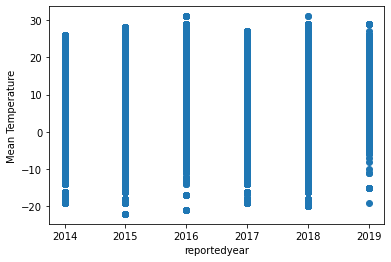

In [336]:
#Visualize the Relationship Between Crime Rate and Temperature 
plt.scatter(temp_binary_encoded_df.reportedyear, temp_binary_encoded_df.Mean_temp)
plt.xlabel('reportedyear')
plt.ylabel('Mean Temperature')
plt.show()

In [349]:
#Format Data to SciKit Learn Specifications 
X = temp_binary_encoded_df.reportedyear.values.reshape(-1, 1)
X.shape

(162096, 1)

In [350]:
# Assign Target Variable to Y 
y = temp_binary_encoded_df.Mean_temp.values.reshape(-1, 1)
y.shape

(162096, 1)

In [351]:
#Create an Instance of the Linear Regression Model
model = LinearRegression()

In [352]:
#Remove Nan and/or Infinity values 
temp_binary_encoded_df.replace([np.inf, -np.inf], np.nan, inplace=True)
temp_binary_encoded_df.fillna(temp_binary_encoded_df.mean(), inplace=True)

/Users/kristenmaskery/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [353]:
# Fit/Train the Model
model.fit(X, y)

LinearRegression()

In [354]:
#Use Predict() Method to Generate Predictions
y_pred = model.predict(X)
print(y_pred.shape)

(162096, 1)


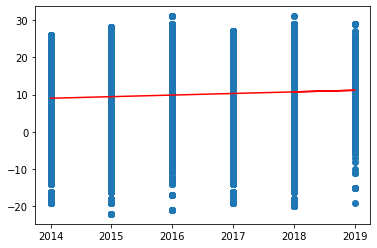

In [355]:
#Plot Predictions 
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [356]:
#Examine our Model
print(model.coef_)
print(model.intercept_)

[[0.42784487]]
[-852.66931218]
